In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

--- Rapport de Classification ---
              precision    recall  f1-score   support

         Bon       0.64      0.98      0.77       128
     Mauvais       0.00      0.00      0.00        19
       Moyen       0.00      0.00      0.00        53

    accuracy                           0.63       200
   macro avg       0.21      0.33      0.26       200
weighted avg       0.41      0.63      0.49       200



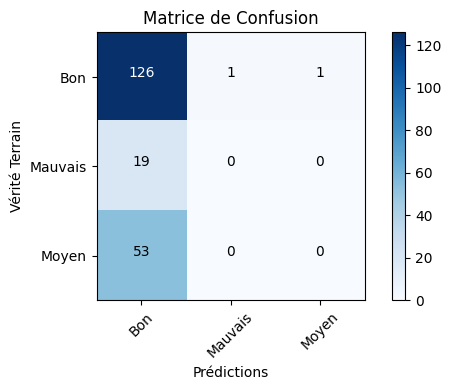

In [ ]:
# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
#X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression logistique avec ajustements
model = LogisticRegression(solver='saga', max_iter=5000)
model.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage des résultats
print("--- Rapport de Classification ---")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.colorbar()

tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Vérité Terrain')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


--- Rapport de Classification ---
              precision    recall  f1-score   support

         Bon       0.63      0.52      0.57       128
     Mauvais       0.07      0.37      0.12        19
       Moyen       0.00      0.00      0.00        53

    accuracy                           0.37       200
   macro avg       0.24      0.30      0.23       200
weighted avg       0.41      0.37      0.38       200



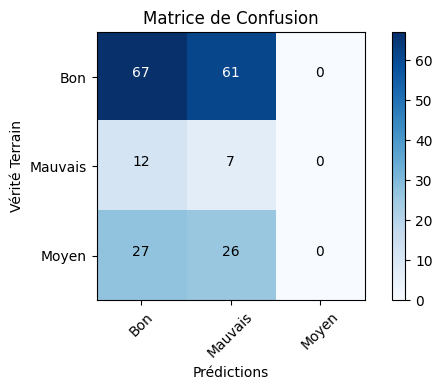

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle de régression logistique avec ajustements
model = LogisticRegression(solver='saga', max_iter=5000, class_weight='balanced')
model.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage des résultats
print("--- Rapport de Classification ---")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.colorbar()

tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Vérité Terrain')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5056 - loss: 0.8357 - val_accuracy: 0.3750 - val_loss: 0.6874
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3467 - loss: 0.6769 - val_accuracy: 0.1688 - val_loss: 0.6180
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1640 - loss: 0.6365 - val_accuracy: 0.0875 - val_loss: 0.5714
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1360 - loss: 0.5877 - val_accuracy: 0.0812 - val_loss: 0.5495
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1234 - loss: 0.5812 - val_accuracy: 0.0812 - val_loss: 0.5382
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1216 - loss: 0.5598 - val_accuracy: 0.0875 - val_loss: 0.5328
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1152 - loss: 0.5702 - val_accuracy: 0.0875 - val_loss: 0.5339
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1483 - loss: 0.5084 - val_accuracy: 0.1000 - val_loss

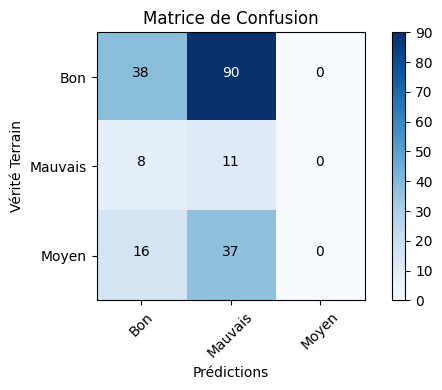

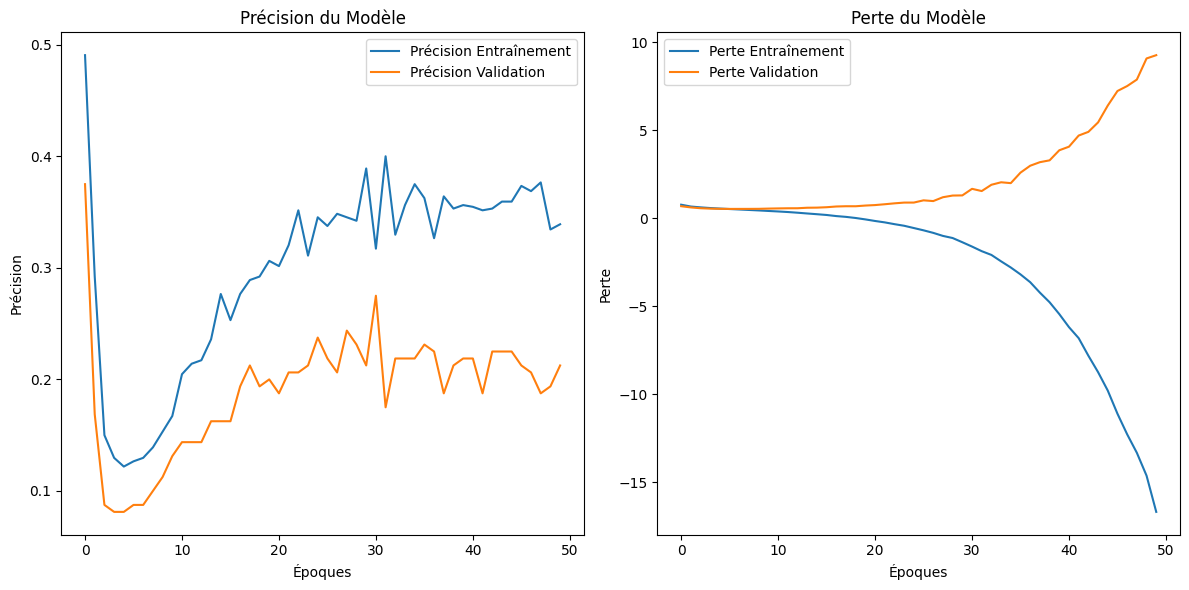

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construction du modèle de réseau de neurones avec Input layer
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Utilisation d'Input pour définir la forme d'entrée
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Pour une classification binaire

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle avec validation
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Affichage des résultats
print("--- Rapport de Classification ---")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.colorbar()

tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Vérité Terrain')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()

# Visualisation des performances d'entraînement et de validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision Validation')
plt.title('Précision du Modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Perte du Modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()


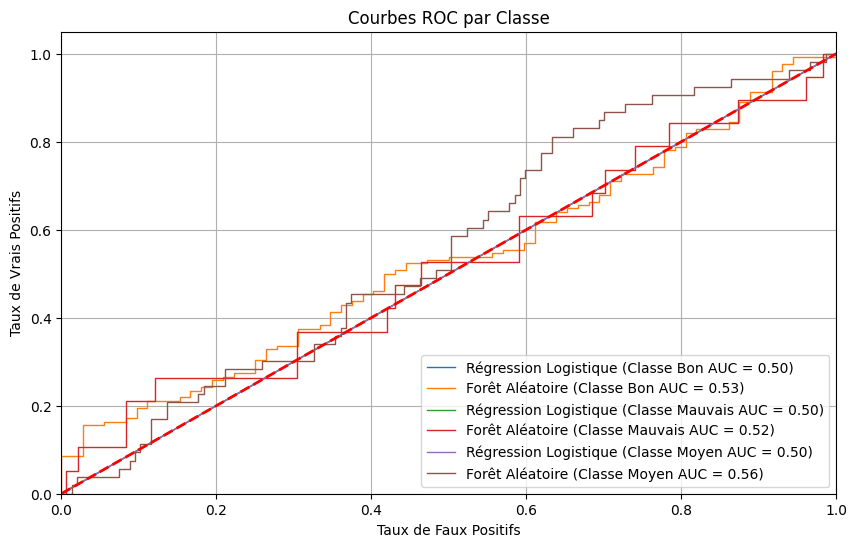

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèles optimisés avec OneVsRestClassifier pour le cas multiclass
logistic_model = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=5000, C=0.001, l1_ratio=0.5, penalty='elasticnet'))
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, class_weight=None))

# Entraînement des modèles
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Calcul des probabilités prédites pour chaque classe
y_pred_prob_logistic = logistic_model.predict_proba(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Tracer les courbes ROC et calculer l'AUC pour chaque classe
plt.figure(figsize=(10, 6))

for i in range(len(label_encoder.classes_)):
    fpr_logistic, tpr_logistic, _ = roc_curve(y_test == i, y_pred_prob_logistic[:, i])
    roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

    fpr_rf, tpr_rf, _ = roc_curve(y_test == i, y_pred_prob_rf[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    # Tracer la courbe ROC pour la régression logistique
    plt.plot(fpr_logistic, tpr_logistic, lw=1,
             label='Régression Logistique (Classe {} AUC = {:.2f})'.format(label_encoder.classes_[i], roc_auc_logistic))

    # Tracer la courbe ROC pour la forêt aléatoire
    plt.plot(fpr_rf, tpr_rf, lw=1,
             label='Forêt Aléatoire (Classe {} AUC = {:.2f})'.format(label_encoder.classes_[i], roc_auc_rf))

plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Diagonale aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC par Classe')
plt.legend(loc="lower right")
plt.grid()
plt.show()


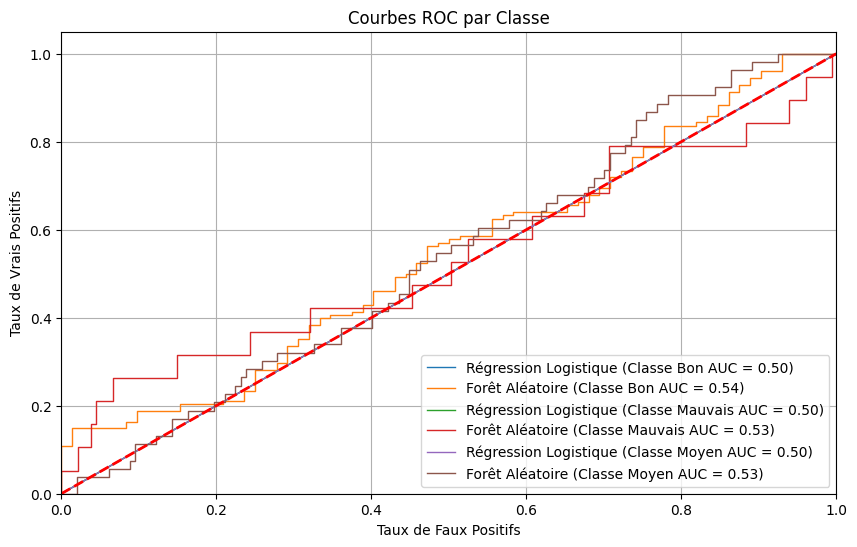

AUC Global Régression Logistique: 0.50
AUC Global Forêt Aléatoire: 0.54


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier

# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèles optimisés avec OneVsRestClassifier pour le cas multiclass
logistic_model = OneVsRestClassifier(LogisticRegression(solver='saga', max_iter=5000, C=0.01, l1_ratio=0.5, penalty='elasticnet'))
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, class_weight=None))

# Entraînement des modèles
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Calcul des probabilités prédites pour chaque classe
y_pred_prob_logistic = logistic_model.predict_proba(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Tracer les courbes ROC et calculer l'AUC pour chaque classe
plt.figure(figsize=(10, 6))

# Initialiser les listes pour stocker les AUCs
roc_auc_logistic_list = []
roc_auc_rf_list = []

for i in range(len(label_encoder.classes_)):
    # Courbe ROC et AUC pour la régression logistique
    fpr_logistic, tpr_logistic, _ = roc_curve(y_test == i, y_pred_prob_logistic[:, i])
    roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
    roc_auc_logistic_list.append(roc_auc_logistic)

    # Courbe ROC et AUC pour la forêt aléatoire
    fpr_rf, tpr_rf, _ = roc_curve(y_test == i, y_pred_prob_rf[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    roc_auc_rf_list.append(roc_auc_rf)

    # Tracer la courbe ROC pour la régression logistique
    plt.plot(fpr_logistic, tpr_logistic, lw=1,
             label='Régression Logistique (Classe {} AUC = {:.2f})'.format(label_encoder.classes_[i], roc_auc_logistic))

    # Tracer la courbe ROC pour la forêt aléatoire
    plt.plot(fpr_rf, tpr_rf, lw=1,
             label='Forêt Aléatoire (Classe {} AUC = {:.2f})'.format(label_encoder.classes_[i], roc_auc_rf))

plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Diagonale aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC par Classe')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calculer l'AUC global en prenant la moyenne des AUCs par classe
auc_global_logistic = np.mean(roc_auc_logistic_list)
auc_global_rf = np.mean(roc_auc_rf_list)

print(f"AUC Global Régression Logistique: {auc_global_logistic:.2f}")
print(f"AUC Global Forêt Aléatoire: {auc_global_rf:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Meilleurs hyperparamètres pour la Régression Logistique : {'C': 0.01, 'penalty': 'l2'}
Précision moyenne (Régression Logistique) : 0.58375
Meilleurs hyperparamètres pour la Forêt Aléatoire : {'class_weight': None, 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Précision moyenne (Forêt Aléatoire) : 0.595

--- Régression Logistique ---
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       128
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        53

    accuracy                           0.64       200
   macro avg       0.21      0.33      0.26       200
weighted avg       0.41      0.64      0.50       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


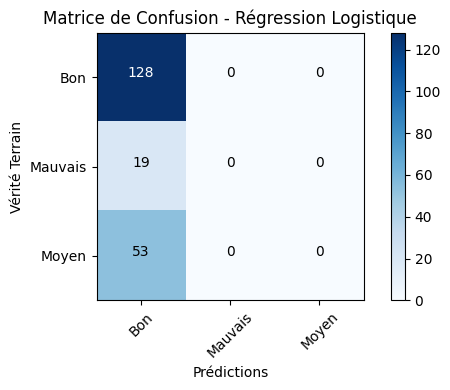


--- Forêt Aléatoire ---
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       128
           1       0.00      0.00      0.00        19
           2       0.50      0.08      0.13        53

    accuracy                           0.64       200
   macro avg       0.38      0.35      0.30       200
weighted avg       0.55      0.64      0.53       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


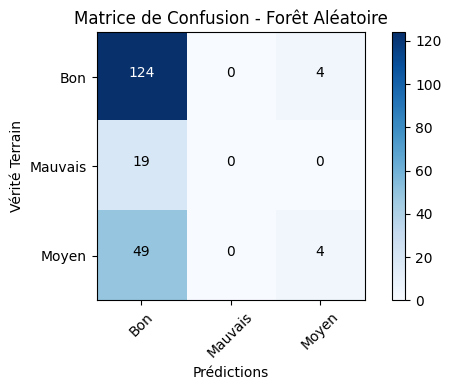

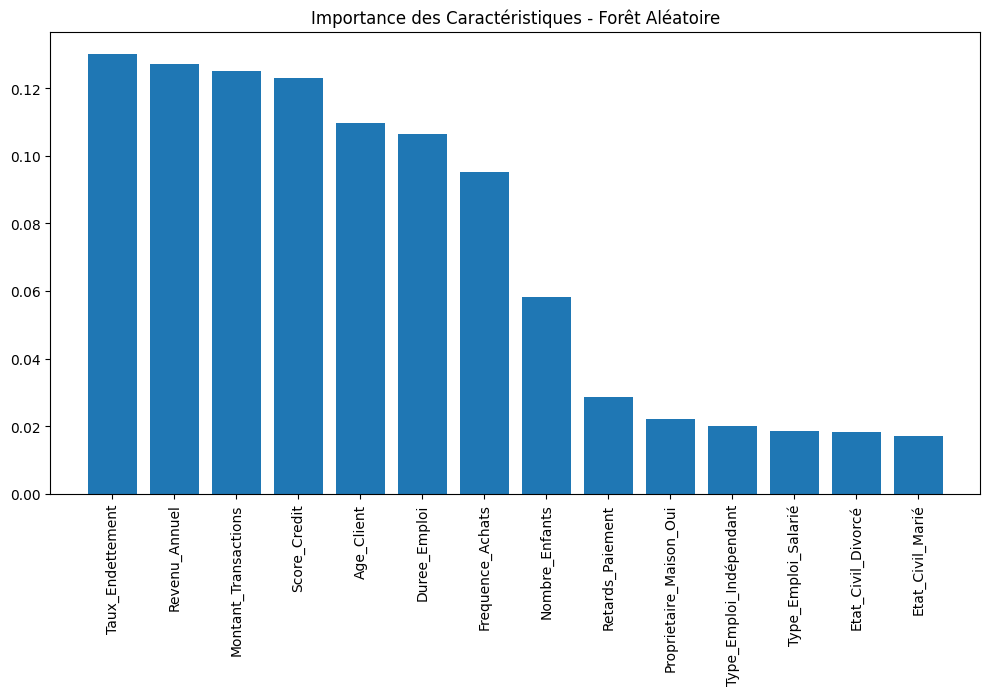

ValueError: multiclass format is not supported

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Ajustement des Hyperparamètres avec Grid Search pour la Régression Logistique
logistic_model = LogisticRegression(solver='saga', max_iter=5000)
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'none']
}
grid_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5)
grid_logistic.fit(X_train, y_train)

print("Meilleurs hyperparamètres pour la Régression Logistique :", grid_logistic.best_params_)

# 2. Validation Croisée pour la Régression Logistique
cv_scores_logistic = cross_val_score(grid_logistic.best_estimator_, X_train, y_train, cv=5)
print("Précision moyenne (Régression Logistique) :", cv_scores_logistic.mean())

# 3. Ajustement des Hyperparamètres avec Grid Search pour la Forêt Aléatoire
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Meilleurs hyperparamètres pour la Forêt Aléatoire :", grid_rf.best_params_)

# 4. Validation Croisée pour la Forêt Aléatoire
cv_scores_rf = cross_val_score(grid_rf.best_estimator_, X_train, y_train, cv=5)
print("Précision moyenne (Forêt Aléatoire) :", cv_scores_rf.mean())

# Évaluation finale sur l'ensemble de test pour les deux modèles optimisés
for model_name, model in zip(['Régression Logistique', 'Forêt Aléatoire'],
                              [grid_logistic.best_estimator_, grid_rf.best_estimator_]):

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Rapport de classification et matrice de confusion
    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.colorbar()

    tick_marks = np.arange(len(label_encoder.classes_))
    plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
    plt.yticks(tick_marks, label_encoder.classes_)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Vérité Terrain')
    plt.xlabel('Prédictions')
    plt.tight_layout()
    plt.show()

# Importance des caractéristiques pour la Forêt Aléatoire
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des Caractéristiques - Forêt Aléatoire")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Courbes ROC et AUC
for model_name, model in zip(['Régression Logistique', 'Forêt Aléatoire'],
                              [grid_logistic.best_estimator_, grid_rf.best_estimator_]):

    # Prédictions probabilistes pour la courbe ROC
    if model_name == 'Régression Logistique':
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr, thresholds)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Courbe ROC - {model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonale aléatoire
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs')
    plt.ylabel('Taux de Vrais Positifs')
    plt.title(f'Courbe ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Chargement des données fictives
df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df.drop(columns=['Client_ID', 'Historique_Credit'])
y = df['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Ajustement des Hyperparamètres avec Grid Search pour la Régression Logistique
logistic_model = LogisticRegression(solver='saga', max_iter=5000)

# Ajout de l1_ratio pour le cas où penalty est elasticnet
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'elasticnet', None],
    'l1_ratio': [0.5]  # Valeur par défaut si vous utilisez elasticnet
}

grid_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5)
grid_logistic.fit(X_train, y_train)

print("Meilleurs hyperparamètres pour la Régression Logistique :", grid_logistic.best_params_)

# Validation Croisée pour la Régression Logistique
cv_scores_logistic = cross_val_score(grid_logistic.best_estimator_, X_train, y_train, cv=5)
print("Précision moyenne (Régression Logistique) :", cv_scores_logistic.mean())

# 2. Ajustement des Hyperparamètres avec Grid Search pour la Forêt Aléatoire
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Meilleurs hyperparamètres pour la Forêt Aléatoire :", grid_rf.best_params_)

# Validation Croisée pour la Forêt Aléatoire
cv_scores_rf = cross_val_score(grid_rf.best_estimator_, X_train, y_train, cv=5)
print("Précision moyenne (Forêt Aléatoire) :", cv_scores_rf.mean())

# Évaluation finale sur l'ensemble de test pour les deux modèles optimisés
for model_name, model in zip(['Régression Logistique', 'Forêt Aléatoire'],
                              [grid_logistic.best_estimator_, grid_rf.best_estimator_]):

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Rapport de classification et matrice de confusion
    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matrice de Confusion - {model_name}')
    plt.colorbar()

    tick_marks = np.arange(len(label_encoder.classes_))
    plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
    plt.yticks(tick_marks, label_encoder.classes_)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Vérité Terrain')
    plt.xlabel('Prédictions')
    plt.tight_layout()
    plt.show()


# Importance des caractéristiques pour la Forêt Aléatoire
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des Caractéristiques - Forêt Aléatoire")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: "/content/drive/MyDrive/Projet Systeme d'evaluation de risque de credit/donnees_fictives_risque_credit_enrichies.csv"

test avec hyperparametres

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Chargement des données fictives
df_test = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Systeme d'evaluation de risque de credit/donnees_test2_fictives_risque_credit_enrichies.csv")

# Préparation des données
X = df_test.drop(columns=['Client_ID', 'Historique_Credit'])
y = df_test['Historique_Credit']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèles optimisés
logistic_model = LogisticRegression(solver='saga', max_iter=5000, C=0.1, penalty='l2')
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, class_weight='balanced')

# Entraînement des modèles
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Préparation des données fictives pour les 10 clients
X_test_fictif = df_test.drop(columns=['Client_ID', 'Historique_Credit'])
X_test_fictif = pd.get_dummies(X_test_fictif, drop_first=True)
X_test_fictif_scaled = scaler.transform(X_test_fictif)

# Évaluation des risques de crédit
y_pred_logistic = logistic_model.predict(X_test_fictif_scaled)
y_pred_rf = rf_model.predict(X_test_fictif_scaled)

# Affichage des résultats
print("\n--- Risques de Crédit Prédits ---")
for i in range(10):
    print(f"Client {df_test['Client_ID'].iloc[i]} :")
    print(f"  - Régression Logistique : {label_encoder.inverse_transform([y_pred_logistic[i]])[0]}")
    print(f"  - Forêt Aléatoire : {label_encoder.inverse_transform([y_pred_rf[i]])[0]}")
    print()



--- Risques de Crédit Prédits ---
Client 1 :
  - Régression Logistique : Moyen
  - Forêt Aléatoire : Moyen

Client 2 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 3 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 4 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Mauvais

Client 5 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 6 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 7 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 8 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 9 :
  - Régression Logistique : Bon
  - Forêt Aléatoire : Bon

Client 10 :
  - Régression Logistique : Moyen
  - Forêt Aléatoire : Moyen

